# Imports

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

plt.ion() # Turn on interactive mode on plots

# PyTorch imports
import torch

# Starting the environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='C:/Users/chris/git/deep-reinforcement-learning/p2_continuous-control/Reacher_Windows_x86_64/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# Environment Setup

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
#print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
#print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
#print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
#print('The state for the first agent looks like:', states[0])

# Agent Setup

In [4]:
# Auto load changes in the imported files
%load_ext autoreload
%autoreload 2

In [8]:
from src.agent import Agent

### Define an agent

In [9]:
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent1 = Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True, use_noise=True)

# Train the agent

In [10]:
from src.ddpg import ddpg_show, ddpg_train

In [8]:
scores1 = ddpg_train(agent1, env, brain_name, num_agents, actor_model_pth='actor_model1.pth', critic_model_pth='critic_model1.pth')

Episode 2	Average Score: 0.24
Episode 4	Average Score: 0.25
Episode 6	Average Score: 0.24
Episode 8	Average Score: 0.24
Episode 10	Average Score: 0.32
Episode 12	Average Score: 0.37
Episode 14	Average Score: 0.40
Episode 16	Average Score: 0.38
Episode 18	Average Score: 0.40
Episode 20	Average Score: 0.47
Episode 22	Average Score: 0.49
Episode 24	Average Score: 0.47
Episode 26	Average Score: 0.47
Episode 28	Average Score: 0.44
Episode 30	Average Score: 0.42
Episode 32	Average Score: 0.40
Episode 34	Average Score: 0.39
Episode 36	Average Score: 0.37
Episode 38	Average Score: 0.35
Episode 40	Average Score: 0.34
Episode 42	Average Score: 0.34
Episode 44	Average Score: 0.33
Episode 46	Average Score: 0.34
Episode 48	Average Score: 0.34
Episode 50	Average Score: 0.32
Episode 52	Average Score: 0.31
Episode 54	Average Score: 0.30
Episode 56	Average Score: 0.34
Episode 58	Average Score: 0.36
Episode 60	Average Score: 0.37
Episode 62	Average Score: 0.43
Episode 64	Average Score: 0.51
Episode 66	A

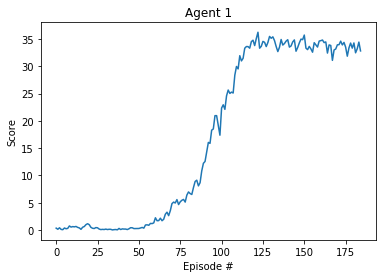

In [9]:
# plot the scores
Scores_plot1 = plt.figure()
ax = Scores_plot1.add_subplot(111)
plt.plot(np.arange(len(scores1)), scores1)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Agent 1')

#plt.savefig("Scores_plot.png")
plt.show()

In [10]:
with open('scores1.txt', 'w') as f:
    for item in scores1:
        f.write("%s\n" % item)

## Try training agents with diffeerent parameters

In [11]:
# No batch normalisation
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent2 = Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=False, use_noise=True)
scores2 = ddpg_train(agent2, env, brain_name, num_agents, actor_model_pth='actor_model2.pth', critic_model_pth='critic_model2.pth', n_episodes=300)

Episode 2	Average Score: 0.81
Episode 4	Average Score: 0.85
Episode 6	Average Score: 0.82
Episode 8	Average Score: 0.76
Episode 10	Average Score: 0.70
Episode 12	Average Score: 0.60
Episode 14	Average Score: 0.57
Episode 16	Average Score: 0.55
Episode 18	Average Score: 0.56
Episode 20	Average Score: 0.62
Episode 22	Average Score: 0.67
Episode 24	Average Score: 0.73
Episode 26	Average Score: 0.78
Episode 28	Average Score: 0.87
Episode 30	Average Score: 0.91
Episode 32	Average Score: 0.95
Episode 34	Average Score: 0.99
Episode 36	Average Score: 1.04
Episode 38	Average Score: 1.13
Episode 40	Average Score: 1.22
Episode 42	Average Score: 1.33
Episode 44	Average Score: 1.43
Episode 46	Average Score: 1.54
Episode 48	Average Score: 1.71
Episode 50	Average Score: 1.97
Episode 52	Average Score: 2.19
Episode 54	Average Score: 2.43
Episode 56	Average Score: 2.65
Episode 58	Average Score: 2.86
Episode 60	Average Score: 3.02
Episode 62	Average Score: 3.22
Episode 64	Average Score: 3.45
Episode 66	A

In [12]:
with open('scores2.txt', 'w') as f:
    for item in scores2:
        f.write("%s\n" % item)

In [14]:
# No added noise
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent3 = Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True, use_noise=False)
scores3 = ddpg_train(agent3, env, brain_name, num_agents, actor_model_pth='actor_model3.pth', critic_model_pth='critic_model3.pth', n_episodes=300)

Episode 2	Average Score: 0.30
Episode 4	Average Score: 0.21
Episode 6	Average Score: 0.19
Episode 8	Average Score: 0.16
Episode 10	Average Score: 0.17
Episode 12	Average Score: 0.18
Episode 14	Average Score: 0.19
Episode 16	Average Score: 0.21
Episode 18	Average Score: 0.21
Episode 20	Average Score: 0.21
Episode 22	Average Score: 0.21
Episode 24	Average Score: 0.22
Episode 26	Average Score: 0.20
Episode 28	Average Score: 0.19
Episode 30	Average Score: 0.19
Episode 32	Average Score: 0.19
Episode 34	Average Score: 0.19
Episode 36	Average Score: 0.19
Episode 38	Average Score: 0.19
Episode 40	Average Score: 0.18
Episode 42	Average Score: 0.17
Episode 44	Average Score: 0.17
Episode 46	Average Score: 0.17
Episode 48	Average Score: 0.17
Episode 50	Average Score: 0.16
Episode 52	Average Score: 0.16
Episode 54	Average Score: 0.15
Episode 56	Average Score: 0.14
Episode 58	Average Score: 0.13
Episode 60	Average Score: 0.13
Episode 62	Average Score: 0.12
Episode 64	Average Score: 0.12
Episode 66	A

In [15]:
with open('scores3.txt', 'w') as f:
    for item in scores3:
        f.write("%s\n" % item)

In [17]:
# Bigger network and using batch normalisation and added noise
actor_hidden_layers = [100, 200, 100]
critic_hidden_layers = [200, 100, 50]
agent4 = Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True, use_noise=True)
scores4 = ddpg_train(agent4, env, brain_name, num_agents, actor_model_pth='actor_model4.pth', critic_model_pth='critic_model4.pth', n_episodes=300)

Episode 2	Average Score: 0.92
Episode 4	Average Score: 0.86
Episode 6	Average Score: 0.92
Episode 8	Average Score: 1.10
Episode 10	Average Score: 1.25
Episode 12	Average Score: 1.34
Episode 14	Average Score: 1.63
Episode 16	Average Score: 2.02
Episode 18	Average Score: 2.33
Episode 20	Average Score: 2.89
Episode 22	Average Score: 3.65
Episode 24	Average Score: 5.13
Episode 26	Average Score: 6.77
Episode 28	Average Score: 8.45
Episode 30	Average Score: 10.15
Episode 32	Average Score: 11.68
Episode 34	Average Score: 13.10
Episode 36	Average Score: 14.34
Episode 38	Average Score: 15.50
Episode 40	Average Score: 16.57
Episode 42	Average Score: 18.33
Episode 44	Average Score: 20.07
Episode 46	Average Score: 21.86
Episode 48	Average Score: 23.60
Episode 50	Average Score: 25.35
Episode 52	Average Score: 27.07
Episode 54	Average Score: 28.73
Episode 56	Average Score: 30.33
Episode 58	Average Score: 31.89
Episode 60	Average Score: 33.31
Episode 62	Average Score: 34.52
Episode 64	Average Score: 

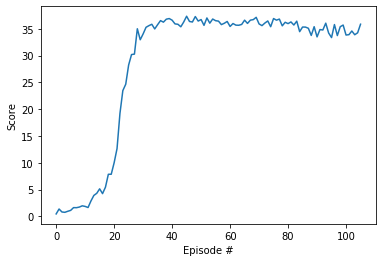

In [18]:
# plot the scores
Scores_plot = plt.figure()
ax = Scores_plot.add_subplot(111)
plt.plot(np.arange(len(scores4)), scores4)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Agent 4')

#plt.savefig("Scores_plot.png")
plt.show()

In [19]:
with open('scores4.txt', 'w') as f:
    for item in scores4:
        f.write("%s\n" % item)

### Initialising agent from saved weights and evaluating performance
Run the cell block below to load the pre-trained weights into the model.

In [16]:
# Agent initialised without added noise
actor_hidden_layers = [50, 50]
critic_hidden_layers = [50, 50]
agent_show = Agent(state_size, action_size, num_agents, 0, actor_hidden_layers, critic_hidden_layers, use_batch_norm=True)
ddpg_show(agent_show, env, brain_name, num_agents, 'results/actor_model1.pth', 'results/critic_model1.pth')

Mean Score (for all agents): 37.21099916826934
Score for individual agents:
[39.38999912 39.31999912 38.87999913 39.37999912 24.80999945 38.74999913
 33.77999924 36.32999919 39.44999912 39.21999912 34.70999922 39.45999912
 36.08999919 39.29999912 35.8599992  35.9099992  39.46999912 35.04999922
 39.58999912 39.46999912]
